## FACS data processing
#### Notebook used for testing gating, looking at correlations, etc.

In [96]:
import pandas as pd
import altair as alt

In [2]:
# making plate layout dictionaries for where samples are in the 96 well plates
lets = [chr(65+i) for i in range(8)]
lets_long = [chr(65+i) for i in range(16)]
gens = [70, 1410, 2640, 5150, 7530, 10150]

P1_wells = ['P1B04', 'P1G04', 'P1C04', 'P1F05', 'P1D03', 'P1C05']
P3_wells = ['P3F03', 'P3G02', 'P3G06', 'P3G05', 'P3C03', 'P3D03']

P1_plate = dict()
P3_plate = dict()
for col, gen in [(1, 1410), (11, 5150), (12, 10150)]:
    for i in range(6):
        P1_plate[lets[i]+str(col).zfill(2)] = 'G'+str(gen)+'_'+P1_wells[i]
        P3_plate[lets[i]+str(col).zfill(2)] = 'G'+str(gen)+'_'+P3_wells[i]

all_P1_clones = ['G'+str(g)+'_'+p+'_'+c for c in ['A', 'B'] for g in gens[::-1] for p in P1_wells]
all_P3_clones = ['G'+str(g)+'_'+p+'_'+c for c in ['A', 'B'] for g in gens[::-1] for p in P3_wells]
for i in range(len(all_P1_clones)):
    P1_plate[lets[i%8]+str(2+i//8).zfill(2)] = all_P1_clones[i]
    P3_plate[lets[i%8]+str(2+i//8).zfill(2)] = all_P3_clones[i]

In [3]:
def get_plate_mat(plate_d):
    mat = []
    for l in lets:
        tmp = []
        for i in range(1,13):
            if l+str(i).zfill(2) in plate_d:
                tmp.append(plate_d[l+str(i).zfill(2)])
            else:
                tmp.append('NA')
        mat.append(tmp)
    return pd.DataFrame(mat, columns=list(range(1,13)), index=lets)

get_plate_mat(P1_plate)

,1,2,3,4,5,6,7,8,9,10,11,12
A,G1410_P1B04,G10150_P1B04_A,G7530_P1C04_A,G5150_P1D03_A,G1410_P1B04_A,G70_P1C04_A,G10150_P1D03_B,G5150_P1B04_B,G2640_P1C04_B,G1410_P1D03_B,G5150_P1B04,G10150_P1B04
B,G1410_P1G04,G10150_P1G04_A,G7530_P1F05_A,G5150_P1C05_A,G1410_P1G04_A,G70_P1F05_A,G10150_P1C05_B,G5150_P1G04_B,G2640_P1F05_B,G1410_P1C05_B,G5150_P1G04,G10150_P1G04
C,G1410_P1C04,G10150_P1C04_A,G7530_P1D03_A,G2640_P1B04_A,G1410_P1C04_A,G70_P1D03_A,G7530_P1B04_B,G5150_P1C04_B,G2640_P1D03_B,G70_P1B04_B,G5150_P1C04,G10150_P1C04
D,G1410_P1F05,G10150_P1F05_A,G7530_P1C05_A,G2640_P1G04_A,G1410_P1F05_A,G70_P1C05_A,G7530_P1G04_B,G5150_P1F05_B,G2640_P1C05_B,G70_P1G04_B,G5150_P1F05,G10150_P1F05
E,G1410_P1D03,G10150_P1D03_A,G5150_P1B04_A,G2640_P1C04_A,G1410_P1D03_A,G10150_P1B04_B,G7530_P1C04_B,G5150_P1D03_B,G1410_P1B04_B,G70_P1C04_B,G5150_P1D03,G10150_P1D03
F,G1410_P1C05,G10150_P1C05_A,G5150_P1G04_A,G2640_P1F05_A,G1410_P1C05_A,G10150_P1G04_B,G7530_P1F05_B,G5150_P1C05_B,G1410_P1G04_B,G70_P1F05_B,G5150_P1C05,G10150_P1C05
G,NA,G7530_P1B04_A,G5150_P1C04_A,G2640_P1D03_A,G70_P1B04_A,G10150_P1C04_B,G7530_P1D03_B,G2640_P1B04_B,G1410_P1C04_B,G70_P1D03_B,NA,NA
H,NA,G7530_P1G04_A,G5150_P1F05_A,G2640_P1C05_A,G70_P1G04_A,G10150_P1F05_B,G7530_P1C05_B,G2640_P1G04_B,G1410_P1F05_B,G70_P1C05_B,NA,NA


In [4]:
get_plate_mat(P3_plate)

,1,2,3,4,5,6,7,8,9,10,11,12
A,G1410_P3F03,G10150_P3F03_A,G7530_P3G06_A,G5150_P3C03_A,G1410_P3F03_A,G70_P3G06_A,G10150_P3C03_B,G5150_P3F03_B,G2640_P3G06_B,G1410_P3C03_B,G5150_P3F03,G10150_P3F03
B,G1410_P3G02,G10150_P3G02_A,G7530_P3G05_A,G5150_P3D03_A,G1410_P3G02_A,G70_P3G05_A,G10150_P3D03_B,G5150_P3G02_B,G2640_P3G05_B,G1410_P3D03_B,G5150_P3G02,G10150_P3G02
C,G1410_P3G06,G10150_P3G06_A,G7530_P3C03_A,G2640_P3F03_A,G1410_P3G06_A,G70_P3C03_A,G7530_P3F03_B,G5150_P3G06_B,G2640_P3C03_B,G70_P3F03_B,G5150_P3G06,G10150_P3G06
D,G1410_P3G05,G10150_P3G05_A,G7530_P3D03_A,G2640_P3G02_A,G1410_P3G05_A,G70_P3D03_A,G7530_P3G02_B,G5150_P3G05_B,G2640_P3D03_B,G70_P3G02_B,G5150_P3G05,G10150_P3G05
E,G1410_P3C03,G10150_P3C03_A,G5150_P3F03_A,G2640_P3G06_A,G1410_P3C03_A,G10150_P3F03_B,G7530_P3G06_B,G5150_P3C03_B,G1410_P3F03_B,G70_P3G06_B,G5150_P3C03,G10150_P3C03
F,G1410_P3D03,G10150_P3D03_A,G5150_P3G02_A,G2640_P3G05_A,G1410_P3D03_A,G10150_P3G02_B,G7530_P3G05_B,G5150_P3D03_B,G1410_P3G02_B,G70_P3G05_B,G5150_P3D03,G10150_P3D03
G,NA,G7530_P3F03_A,G5150_P3G06_A,G2640_P3C03_A,G70_P3F03_A,G10150_P3G06_B,G7530_P3C03_B,G2640_P3F03_B,G1410_P3G06_B,G70_P3C03_B,NA,NA
H,NA,G7530_P3G02_A,G5150_P3G05_A,G2640_P3D03_A,G70_P3G02_A,G10150_P3G05_B,G7530_P3D03_B,G2640_P3G02_B,G1410_P3G05_B,G70_P3D03_B,NA,NA


In [5]:
from matplotlib import pyplot as pl
import numpy as np
from scipy import stats as sci_stats
import pandas as pd
# this was installed like: pip install FlowCytometryTools
import FlowCytometryTools as fct
import seaborn as sns
from glob import glob
from collections import defaultdict

/n/home13/mjohnson/anaconda3/envs/milo_py37/lib/python3.7/site-packages/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)


## Testing gating

/n/home13/mjohnson/anaconda3/envs/milo_py37/lib/python3.7/site-packages/FlowCytometryTools/core/transforms.py:80: RuntimeWarning: invalid value encountered in log10
  return where(x <= th, log10(th) * 1. * r / d, log10(x) * 1. * r / d)
/n/home13/mjohnson/anaconda3/envs/milo_py37/lib/python3.7/site-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


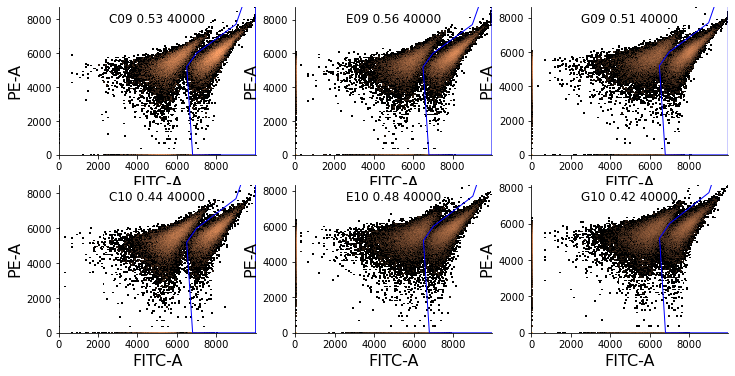

In [6]:
def plot_gating(tp, offset, tgate, x, y, cellgate=None, cellgate_channels=None):
    f, subs = pl.subplots(2, 3, figsize=(12,6))
    for i in range(3):
        for j in range(2):
            well = lets_long[i*2+offset]+str(j+9).zfill(2)
            flist = glob('../../data/FACS/' + tp + '/Specimen*' + well + '.fcs')
            assert len(flist)==1
            if cellgate:
                samp = fct.FCMeasurement(ID=well, datafile=flist[0]).transform('tlog', channels=[x, y]+cellgate_channels)
                samp = samp.gate(cellgate)
            else:
                samp = fct.FCMeasurement(ID=well, datafile=flist[0]).transform('tlog', channels=[x, y])
            samp.plot([x, y], ax=subs[j][i], gates=[tgate])
            subs[j][i].set_title(well)
            ref_counts = samp.gate(tgate).shape[0]
            total_counts = samp.shape[0]
            if total_counts < 1000: # Excluding timepoints with less than 1000 reads
                freq = np.nan
            else:
                freq = ref_counts/total_counts
            subs[j][i].set_title(well + ' ' + "{:.2f}".format(freq) + " " + str(total_counts), y=0.85)
    sns.despine()
    
p1_fortessa = fct.PolyGate([(6800, -1), (6500, 5200), (7000, 6000), (9000, 7700), (10000, 11000), (10000, -1)], ['FITC-A', 'PE-A'])
plot_gating('VTn_FA1_T1', 2, p1_fortessa, 'FITC-A', 'PE-A')

## In YPD, gating on FITC and PE works best for separating the reference and test populations. 

## For SC at 37C, we can use FITC and SSC, but there is a cloud of small (low SSC) particles (possibly dead cells) in the middle, so we first set an SSC threshold to gate for live cells and then gate on FITC and SSC:

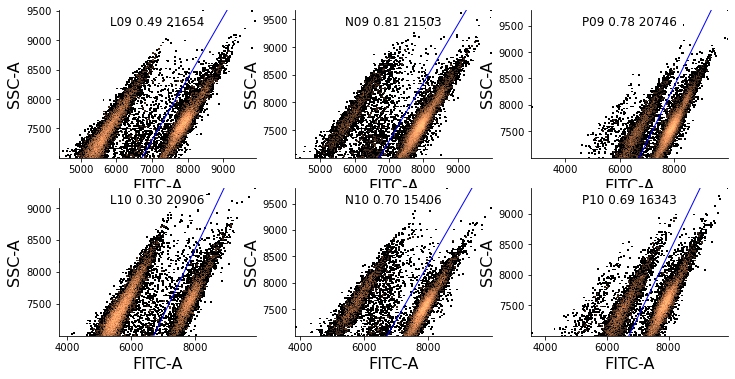

In [7]:
sc_fortessa_ssc = fct.PolyGate([(5000, 5200), (11000, 11500), (13000, 12000), (10000, -1)], ['FITC-A', 'SSC-A'])
cg = fct.ThresholdGate(7000, 'SSC-A', 'above')
plot_gating('VTn_FA2_T1', 11, sc_fortessa_ssc, 'FITC-A', 'SSC-A', cellgate=cg, cellgate_channels=['SSC-A'])

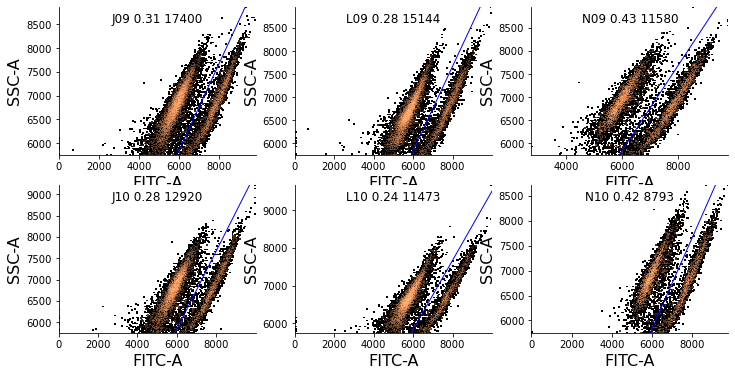

In [8]:
sc_fortessa_ssc_fa3 = fct.PolyGate([(5300, 5200), (10000, 9500), (13000, 12000), (10000, -1)], ['FITC-A', 'SSC-A'])
cg_fa3 = fct.ThresholdGate(5750, 'SSC-A', 'above')
plot_gating('VTn_FA3_T1', 9, sc_fortessa_ssc_fa3, 'FITC-A', 'SSC-A', cellgate=cg_fa3, cellgate_channels=['SSC-A'])

In [9]:
pl_fa12 = [['VTnC_P1_1', 'VTnC_P1_2'], ['VTnC_P3_1', 'VTnC_P3_2']]
plate_layout = {'FA1': pl_fa12, 'FA2': pl_fa12, 'FA3': [['VTnC_P1_1', 'VTnC_P1_2'], ['ignore', 'ignore']]} 
# the ignore ones are a test I did where I preconditioned in YPD and assayed in SC, which I am not using

def well_to_plate_well(well, plates):
    # From 384 well plate to plate name and 96 well plate well name
    row = ord(well[0])-65
    col = int(well[1:])
    plate = plates[row % 2][(col-1) %2]
    plate_row = chr((row-2)//2+66)
    plate_col = (col-1)//2+1
    return plate + '_' + plate_row + str(plate_col).zfill(2)

#example
well_to_plate_well('B01', plate_layout['FA1'])

'VTnC_P3_1_A01'

In [10]:
def get_plate_data(dir_base, plate_set, cellgate, plate_type='384'):
    # given a directory base like 'FA_timepoint_0/Specimen_001_', this will try to read in all the files corresponding to each well in a 96 or 384 well plate
    # and will return a dictionary like td['well_id'] = dataframe with facs info
    print('reading from', dir_base)
    td = dict()
    wells_missed = []
    if plate_type == '384':
        let_top, col_top = 16, 25
    elif plate_type == '96':
        let_top, col_top = 8, 13
    else:
        print('unrecognized plate type')
        return None
    for let in [chr(i+65) for i in range(let_top)]:
        for col in range(1, col_top):
            orig_well = let + str(col).zfill(2)
            if plate_type == '384':
                well = well_to_plate_well(orig_well, plate_set)
            else:
                well = orig_well
            flist = glob(dir_base + '*' + orig_well + '.fcs')
            try:
                assert len(flist) == 1
                # Reading in file and immediately gating on good cells
                samp = fct.FCMeasurement(ID=well, datafile=flist[0]).transform('tlog', channels=['FITC-A', 'SSC-A', 'PE-A'])
                if cellgate:
                    samp = samp.gate(cellgate)
                td[well] = samp
            except AssertionError:
                wells_missed.append(well)
                td[well] = None
    if len(wells_missed) > 0:
        print('Missed files for', len(wells_missed))
    return td
    

## READING FILES
cellgates = {'FA1': None, 'FA2': cg, 'FA3': cg_fa3}
tps = [0,1,2,3]
dirs = ['../../data/FACS/VTn_FA'+f+'_T'+str(tp) for tp in tps for f in ['1', '2', '3']]
dir_d = {d.split('/')[-1]: d for d in dirs}
dat_d = dict()
for d in dir_d:
    dat_d[d] = get_plate_data(dir_d[d] + '/Specimen_001_', plate_layout[d.split('_')[-2]], cellgates[d.split('_')[-2]])

reading from ../../data/FACS/VTn_FA1_T0/Specimen_001_
reading from ../../data/FACS/VTn_FA2_T0/Specimen_001_
reading from ../../data/FACS/VTn_FA3_T0/Specimen_001_
Missed files for 96
reading from ../../data/FACS/VTn_FA1_T1/Specimen_001_
reading from ../../data/FACS/VTn_FA2_T1/Specimen_001_
reading from ../../data/FACS/VTn_FA3_T1/Specimen_001_
Missed files for 88
reading from ../../data/FACS/VTn_FA1_T2/Specimen_001_
reading from ../../data/FACS/VTn_FA2_T2/Specimen_001_
reading from ../../data/FACS/VTn_FA3_T2/Specimen_001_
Missed files for 88
reading from ../../data/FACS/VTn_FA1_T3/Specimen_001_
reading from ../../data/FACS/VTn_FA2_T3/Specimen_001_
reading from ../../data/FACS/VTn_FA3_T3/Specimen_001_
Missed files for 88


## OK so each assay has 2 good plates and two bad ones:
* in the first assay (FA1) the P3 (SC) media was messed up, but the P1 data is good
* in FA2, I tried to assay the P1 clones in SC and they got crushed by the reference, so that is excluded as well. The P3 in Sc data was good (though gen 70 clones have noisy measurements)
* in FA3, I did a test where I preconditioned in YPD before assaying in SC (for the P1 clones). This actually gave very similar results but I am excluding it.
* Note: the reference used for the P1 clones in FA3 (in SC 37C) is different than the reference used for the P3 clones in SC 37C (I will use a conversion for them though)

In [67]:
blanks_1 = ['G01', 'G11', 'G12', 'H11'] #excluding corners (H01 and H12)
blanks_2 = ['E01', 'F01', 'G01']
assays = [('P1_YPD', 'FA1', 'VTnC_P1', p1_fortessa, blanks_1, [0,1,2,3]), # name, assay code, prefix, gate, blank wells, tps for blanks
          ('P3_SC', 'FA2', 'VTnC_P3', sc_fortessa_ssc, blanks_1, [0,1,2,3]), 
          ('P1_SC', 'FA3', 'VTnC_P1', sc_fortessa_ssc_fa3, blanks_2, [1,2,3])] # just forgot to measure the blanks at T0

## Function for getting reference cell counts and percentages:

In [68]:
def get_ref_counts(df, use_gate):
    ref_counts = df.gate(use_gate).shape[0]
    total_counts = df.shape[0]
    density = df.shape[0]/np.nanmax(df['Time'])
    if total_counts < 1000: # Excluding timepoints with less than 1000 reads
        freq = np.nan
        #print('Low counts for a sample...')
    else:
        freq = ref_counts/total_counts
    return ref_counts, total_counts-ref_counts, freq, density

## Blank (except ref) getting % not glowing

In [69]:
blank_ref_rec = defaultdict(list)
# Using P1 ref-only wells to find the not glowing % in YPD and P3 ref-only wells to do the same in SC 37C
for info in assays:
    for t in info[5]:
        for w in info[4]:
            for r in ['1', '2']:
                if dat_d['VTn_' + info[1] + '_T'+str(t)][info[2]+'_'+r+'_'+w]:
                    blank_ref_rec[info[0]].append(get_ref_counts(dat_d['VTn_' + info[1] + '_T'+str(t)][info[2]+'_'+r+'_'+w], info[3])[2])
        

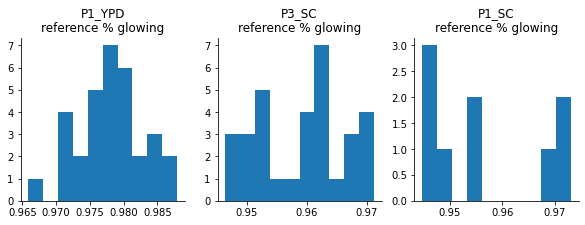

In [70]:
f, subs = pl.subplots(1,3, figsize=(10, 3))
for i in range(3):
    subs[i].hist(blank_ref_rec[assays[i][0]])
    subs[i].set_title(assays[i][0] + '\nreference % glowing')
sns.despine()

In [71]:
def get_fit(row, tps):
    # Getting ref frequencies, excluding low count (nan) timepoints
    ref_freqs = np.array([row['Ref_Freq_T' + str(t)] for t in tps if pd.notnull(row['Ref_Freq_T' + str(t)])])
    times = np.array([t for t in tps if pd.notnull(row['Ref_Freq_T' + str(t)])])*10
    # excluding time intervals where ref or test is >95% in both timepoints
    use_tp_until = len(times)
    for t in range(1, len(times)):
        if (ref_freqs[t] > 0.95 and ref_freqs[t-1] > 0.95) or (ref_freqs[t] < 0.05 and ref_freqs[t-1] > 0.05):
            use_tp_until = t-1
            break
    if use_tp_until > 0:
        test_freqs = 1-ref_freqs
        # s = log slope of test freq / reference freq
        return sci_stats.linregress(times[:use_tp_until+1], np.log(test_freqs[:use_tp_until+1]/ref_freqs[:use_tp_until+1]))[0] 

In [72]:
final_d = dict()
tps_use = [0,1,2,3]
for name, assay_code, prefix, gate, jnk1, jnk2 in assays:
    for r in ['1', '2']:
        mat = []
        for row in range(8):
            for col in range(12):
                well = chr(row+65) + str(col+1).zfill(2)
                if dat_d['VTn_' + assay_code + '_T0'][prefix+'_1_'+well]: # excludes the blanks in FA3 without throwing errors
                    tmp = [name, r, well]
                    for tp in [0, 1, 2, 3]:
                        result = get_ref_counts(dat_d['VTn_' + assay_code + '_T' + str(tp)][prefix+'_'+r+'_'+well], gate) 
                        tmp += list(result) + [(1/np.nanmean(blank_ref_rec[name]))*result[2]]
                    mat.append(tmp)
        tmp_colnames = ['Assay', 'Rep', 'Well'] + [i+t for t in ['0', '1', '2', '3'] for i in ['Ref_Counts_T', 'NonRef_Counts_T', 'Uncorrected_Ref_Freq_T', 'Density_T', 'Ref_Freq_T']]
        td = pd.DataFrame(mat, columns=tmp_colnames)
        td['s'] = td.apply(lambda r: get_fit(r, tps_use), axis=1)
        final_d[name+'_R'+r] = td

/n/home13/mjohnson/anaconda3/envs/milo_py37/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  
/n/home13/mjohnson/anaconda3/envs/milo_py37/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/n/home13/mjohnson/anaconda3/envs/milo_py37/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/n/home13/mjohnson/anaconda3/envs/milo_py37/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


## The P1 in P3 data uses a different reference than the P3 in P3 data, so we will shift all fitnesses measured there by the fitness difference between the references (about 0.04)

In [86]:
P3_old_raw_data = pd.read_csv('../accessory_files/P3_freq_and_s_data.csv')
# The 2490A clone is in well D04
ref_clone_fits = np.array(P3_old_raw_data[P3_old_raw_data['Well']=='D04'][[i for i in P3_old_raw_data if '_s_R' in i]])[0]
ref_dif = np.median(ref_clone_fits)
print(f'The 11470 ref is {-1*ref_dif} more fit than the 2490 one')
P3_old_raw_data[P3_old_raw_data['Well']=='D04'][['strain']+[i for i in P3_old_raw_data if '_s_R' in i]]

The 11470 ref is 0.03996201365206575 more fit than the 2490 one


,strain,Gen550_s_R1,Gen1410_s_R1,Gen5150_s_R1,Gen10150_s_R1,Gen550_s_R2,Gen1410_s_R2,Gen5150_s_R2,Gen10150_s_R2,Gen70_s_R1,Gen2640_s_R1,Gen3630_s_R1,Gen7530_s_R1,Gen70_s_R2,Gen2640_s_R2,Gen3630_s_R2,Gen7530_s_R2
39,2490A,-0.049019,-0.057202,-0.046127,-0.059972,-0.03974,-0.004502,-0.054548,-0.041426,0.025276,-0.022293,0.015787,-0.011754,-0.027589,-0.059263,-0.040184,-0.037542


In [87]:
for a in ['P1_SC_R1', 'P1_SC_R2']:
    td = final_d[a]
    td['s_raw'] = td['s']
    td['s'] = td['s_raw']+ref_dif

In [122]:
all_data = pd.concat([final_d[d] for d in final_d])
all_data.to_csv('../../output/FACS_assay/all_FACS_counts_and_s.csv', index=False)

/n/home13/mjohnson/anaconda3/envs/milo_py37/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [123]:
comb_d = dict()
assay_names = ['P1_YPD', 'P3_SC', 'P1_SC']
a_plates = {'P1': P1_plate, 'P3': P3_plate}
cols = ['Well', 's', 'Ref_Freq_T0', 'Ref_Freq_T1']
for a in assay_names:
    comb_d[a] = final_d[a+'_R1'][cols].merge(final_d[a+'_R2'][cols], on='Well', how='inner', suffixes=('_R1', '_R2'))
    comb_d[a]['Strain'] = comb_d[a]['Well'].map(a_plates[a[:2]])
    comb_d[a] = comb_d[a][pd.notnull(comb_d[a]['Strain'])]
    comb_d[a]['s'] = np.mean(comb_d[a][['s_R1', 's_R2']], axis=1)
    comb_d[a]['Ref_Freq_T0'] = np.nanmean(comb_d[a][['Ref_Freq_T0_R1', 'Ref_Freq_T0_R2']], axis=1)
    comb_d[a]['Ref_Freq_T1'] = np.nanmean(comb_d[a][['Ref_Freq_T1_R1', 'Ref_Freq_T1_R2']], axis=1)
    comb_d[a]['Pop'] = comb_d[a]['Strain'].str.split('_').str[1]
    
    

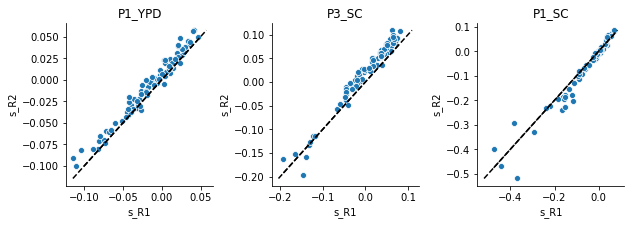

In [124]:
f, subs = pl.subplots(1, 3, figsize=(10, 3))
pl.subplots_adjust(wspace=0.4)
for i in range(3):
    a = assay_names[i]
    extent = [np.min(comb_d[a][['s_R1', 's_R2']]), np.max(comb_d[a][['s_R1', 's_R2']])]
    subs[i].plot(extent, extent, c='k', linestyle='dashed')
    sns.scatterplot(data=comb_d[a], x='s_R1', y='s_R2', ax=subs[i])
    subs[i].set_title(a)
sns.despine()

### OK so in this second assay, the P3 clones have Rep 2 where the reference did worse. I am not sure why... My favorite theory is it has something to do with bottlenecking the cells a bit more in rep 2 of each. For now, onwards:

## This maybe tells us something about carrying capacity??

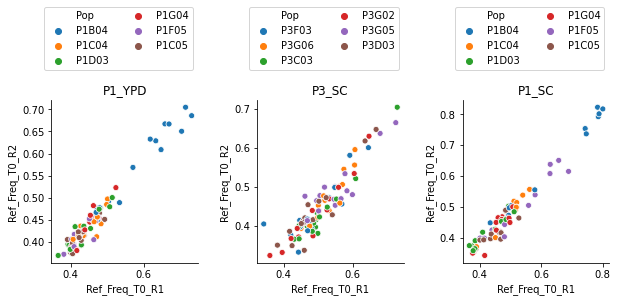

In [125]:
f, subs = pl.subplots(1, 3, figsize=(10, 3))
pl.subplots_adjust(wspace=0.4)
for i in range(3):
    a = assay_names[i]
    sns.scatterplot(data=comb_d[a], x='Ref_Freq_T0_R1', y='Ref_Freq_T0_R2', ax=subs[i], hue='Pop')
    subs[i].set_title(a)
    subs[i].legend(ncol=2, bbox_to_anchor=(1, 1.6))
sns.despine()

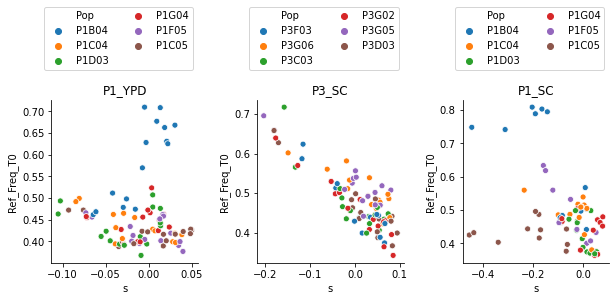

In [126]:
f, subs = pl.subplots(1, 3, figsize=(10, 3))
pl.subplots_adjust(wspace=0.4)
for i in range(3):
    a = assay_names[i]
    sns.scatterplot(data=comb_d[a], x='s', y='Ref_Freq_T0', ax=subs[i], hue='Pop')
    subs[i].set_title(a)
    subs[i].legend(ncol=2, bbox_to_anchor=(1, 1.6))
sns.despine()

In [127]:
old_rearrange = dict()
for p in ['P1', 'P3']:
    mat = []
    for jnk, row in pd.read_csv('../accessory_files/'+p+'_freq_and_s_data.csv').iterrows():
        for gen in gens:
            mat.append(['G'+str(gen)+'_'+p+row['Well'], row['Gen'+str(gen)+'_s'], row['Gen'+str(gen)+'_s_scaled']])
        
    old_rearrange[p] = pd.DataFrame(mat, columns=['Gen_pop', 's_VLTE', 's_VLTE_scaled'])

In [128]:
compare_results = dict()
for a in comb_d:
    tmd = comb_d[a]
    pops = sorted(set(['_'.join(i.split('_')[:2]) for i in list(tmd['Strain'])]))
    mat = []
    for p in pops:
        tmp = [p]
        td = tmd[tmd['Strain']==p]
        if len(td)==1:
            tmp.append(td.iloc[0]['s'])
            tmp.append(td.iloc[0]['Ref_Freq_T0'])
        else:
            tmp += [np.nan, np.nan]
        td = tmd[tmd['Strain']==p+'_A']
        assert len(td)==1
        tmp.append(td.iloc[0]['s'])
        tmp.append(td.iloc[0]['Ref_Freq_T0'])
        td = tmd[tmd['Strain']==p+'_B']
        assert len(td)==1
        tmp.append(td.iloc[0]['s'])
        tmp.append(td.iloc[0]['Ref_Freq_T0'])
        mat.append(tmp)
    
    compare_results[a] = pd.DataFrame(mat, columns=['Gen_pop', 'Pop_s', 'Pop_Ref_Freq_T0', 'Clone_A_s', 'Clone_A_Ref_Freq_T0', 'Clone_B_s', 'Clone_B_Ref_Freq_T0'])
    compare_results[a]['Clone_s'] = np.nanmean(compare_results[a][['Clone_A_s', 'Clone_B_s']], axis=1)
compare_results['P1_SC'].head(2)

/n/home13/mjohnson/anaconda3/envs/milo_py37/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: Mean of empty slice


,Gen_pop,Pop_s,Pop_Ref_Freq_T0,Clone_A_s,Clone_A_Ref_Freq_T0,Clone_B_s,Clone_B_Ref_Freq_T0,Clone_s
0,G10150_P1B04,NaN,NaN,-0.164501,0.803070,-0.142845,0.794752,-0.153673
1,G10150_P1C04,NaN,NaN,0.000022,0.538914,-0.009206,0.508604,-0.004592


In [129]:
for a in ['P1_YPD', 'P3_SC']:
    compare_results[a] = compare_results[a].merge(old_rearrange[a.split('_')[0]], on='Gen_pop', how='left')
    compare_results[a]['Gen'] = compare_results[a]['Gen_pop'].str.split('_').str[0].str[1:]

compare_results['P1_YPD'].head(2)

,Gen_pop,Pop_s,Pop_Ref_Freq_T0,Clone_A_s,Clone_A_Ref_Freq_T0,Clone_B_s,Clone_B_Ref_Freq_T0,Clone_s,s_VLTE,s_VLTE_scaled,Gen
0,G10150_P1B04,0.009163,0.677246,0.013190,0.708608,0.030203,0.668234,0.021696,0.026455,0.019163,10150
1,G10150_P1C04,0.027589,0.399160,0.038249,0.415646,0.030227,0.418828,0.034238,0.055203,0.047911,10150


# Plotting correlations:

In [130]:
def plot_clone_corrs(cr):
    f, subs = pl.subplots(1, 3, figsize=(10, 3), dpi=100, sharex=True, sharey=True)
    for i in range(3):
        subs[i].plot([-0.1, 0.05], [-0.1, 0.05], c='k', linestyle='dashed', zorder=0)
    subs[0].scatter(cr['Clone_A_s'], cr['Clone_B_s'], zorder=1)
    subs[0].set_xlabel('Clone A s')
    subs[0].set_ylabel('Clone B s')
    subs[1].scatter(cr['Clone_s'], cr['Pop_s'], zorder=1)
    subs[1].set_xlabel('Clone ave s')
    subs[1].set_ylabel('Pop s')
    subs[2].scatter(cr['Clone_s'], cr['s_VLTE'], zorder=1)
    subs[2].set_xlabel('Clone s')
    subs[2].set_ylabel('Pop s measured previously')
    sns.despine()


## Within environment, fitness measurements among clones are similar, and line up with population fitness measured previously (though some low fitness clones have noisy measurements)

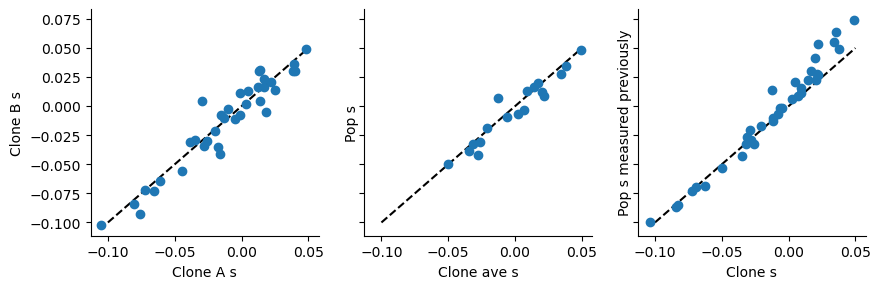

In [131]:
plot_clone_corrs(compare_results['P1_YPD'])

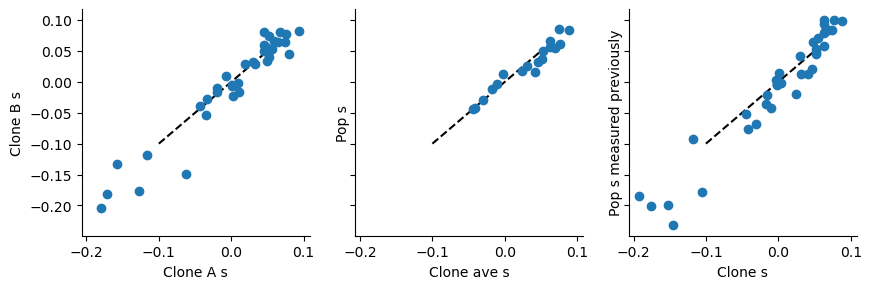

In [132]:
plot_clone_corrs(compare_results['P3_SC'])

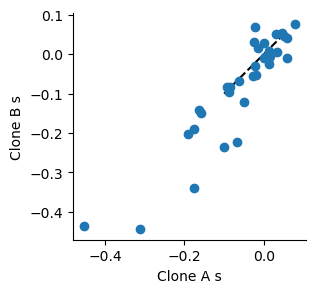

In [133]:
f, sub = pl.subplots(1, 1, figsize=(3, 3), dpi=100, sharex=True, sharey=True)
cr = compare_results['P1_SC']
sub.plot([-0.1, 0.05], [-0.1, 0.05], c='k', linestyle='dashed', zorder=0)
sub.scatter(cr['Clone_A_s'], cr['Clone_B_s'], zorder=1)
sub.set_xlabel('Clone A s')
sub.set_ylabel('Clone B s')
sns.despine()

# OK outputting

In [134]:
env_fix = {'YPD': 'YPD_30C', 'SC': 'SC_37C'}
for a in compare_results:
    compare_results[a]['Environment'] = [env_fix[a.split('_')[1]]]*len(compare_results[a])
    compare_results[a]['Pop'] = compare_results[a]['Gen_pop'].str.split('_').str[1]
    compare_results[a]['Gen'] = compare_results[a]['Gen_pop'].str.split('_').str[0].str[1:]
    compare_results[a]['Sample'] = compare_results[a]['Gen_pop']+'_'+compare_results[a]['Environment']
    compare_results[a]['Fitness'] = np.nanmean(compare_results[a][['Clone_A_s', 'Clone_B_s']], axis=1)
    compare_results[a]['Freq_T0'] = 1-np.nanmean(compare_results[a][['Clone_A_Ref_Freq_T0', 'Clone_B_Ref_Freq_T0']], axis=1)
    
    
together = pd.concat([compare_results[a] for a in compare_results])

/n/home13/mjohnson/anaconda3/envs/milo_py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/n/home13/mjohnson/anaconda3/envs/milo_py37/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [135]:
cols = ['Sample', 'Gen_pop', 'Gen', 'Pop', 'Environment', 'Fitness', 'Freq_T0', 's_VLTE', 's_VLTE_scaled',
        'Clone_A_Ref_Freq_T0', 'Clone_A_s', 'Clone_B_Ref_Freq_T0', 'Clone_B_s', 'Pop_Ref_Freq_T0', 'Pop_s']
together[cols]

,Sample,Gen_pop,Gen,Pop,Environment,Fitness,Freq_T0,s_VLTE,s_VLTE_scaled,Clone_A_Ref_Freq_T0,Clone_A_s,Clone_B_Ref_Freq_T0,Clone_B_s,Pop_Ref_Freq_T0,Pop_s
0,G10150_P1B04_YPD_30C,G10150_P1B04,10150,P1B04,YPD_30C,0.021696,0.311579,0.026455,0.019163,0.708608,0.013190,0.668234,0.030203,0.677246,0.009163
1,G10150_P1C04_YPD_30C,G10150_P1C04,10150,P1C04,YPD_30C,0.034238,0.582763,0.055203,0.047911,0.415646,0.038249,0.418828,0.030227,0.399160,0.027589
2,G10150_P1C05_YPD_30C,G10150_P1C05,10150,P1C05,YPD_30C,0.049031,0.572865,0.074538,0.067246,0.428247,0.048486,0.426023,0.049575,0.417819,0.048099
3,G10150_P1D03_YPD_30C,G10150_P1D03,10150,P1D03,YPD_30C,0.009032,0.528379,0.015437,0.008145,0.435992,0.013600,0.507251,0.004464,0.442637,0.013217
4,G10150_P1F05_YPD_30C,G10150_P1F05,10150,P1F05,YPD_30C,0.037805,0.611830,0.049020,0.041728,0.376834,0.039492,0.399506,0.036117,0.390726,0.034456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,G7530_P1C04_SC_37C,G7530_P1C04,7530,P1C04,SC_37C,-0.001453,0.487759,NaN,NaN,0.514713,0.004220,0.509769,-0.007126,NaN,NaN
32,G7530_P1C05_SC_37C,G7530_P1C05,7530,P1C05,SC_37C,-0.445743,0.571839,NaN,NaN,0.424621,-0.454726,0.431701,-0.436761,NaN,NaN
33,G7530_P1D03_SC_37C,G7530_P1D03,7530,P1D03,SC_37C,-0.026708,0.518107,NaN,NaN,0.465825,-0.022991,0.497962,-0.030425,NaN,NaN
34,G7530_P1F05_SC_37C,G7530_P1F05,7530,P1F05,SC_37C,-0.154465,0.374175,NaN,NaN,0.633519,-0.158856,0.618130,-0.150074,NaN,NaN


In [136]:
cols = ['Sample', 'Gen_pop', 'Gen', 'Pop', 'Environment', 'Fitness', 'Freq_T0', 's_VLTE', 's_VLTE_scaled',
        'Clone_A_Ref_Freq_T0', 'Clone_A_s', 'Clone_B_Ref_Freq_T0', 'Clone_B_s', 'Pop_Ref_Freq_T0', 'Pop_s']
together[cols].to_csv('../../output/VTn_x.csv', index=False)

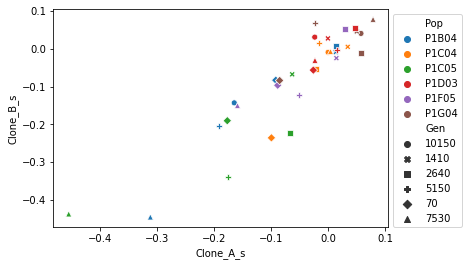

In [137]:
sns.scatterplot(data=compare_results['P1_SC'], x='Clone_A_s', y='Clone_B_s', hue='Pop', style='Gen')
pl.legend(bbox_to_anchor=(1,1))

In [34]:
td = compare_results['P1_SC']
td[td.Pop=='P1B04']

,Gen_pop,Pop_s,Pop_Ref_Freq_T0,Clone_A_s,Clone_A_Ref_Freq_T0,Clone_B_s,Clone_B_Ref_Freq_T0,Clone_s,Environment,Pop,Gen,Sample,Fitness,Freq_T0
0,G10150_P1B04,NaN,NaN,-0.124539,0.803070,-0.102883,0.794752,-0.113711,SC_37C,P1B04,10150,G10150_P1B04_SC_37C,-0.113711,0.201089
6,G1410_P1B04,NaN,NaN,0.053369,0.441171,0.031172,0.496462,0.042271,SC_37C,P1B04,1410,G1410_P1B04_SC_37C,0.042271,0.531184
12,G2640_P1B04,NaN,NaN,0.053976,0.502673,0.048683,0.567059,0.051330,SC_37C,P1B04,2640,G2640_P1B04_SC_37C,0.051330,0.465134
18,G5150_P1B04,NaN,NaN,-0.150796,0.788877,-0.163516,0.808799,-0.157156,SC_37C,P1B04,5150,G5150_P1B04_SC_37C,-0.157156,0.201162
24,G70_P1B04,NaN,NaN,-0.051728,0.476661,-0.042926,0.483221,-0.047327,SC_37C,P1B04,70,G70_P1B04_SC_37C,-0.047327,0.520059
30,G7530_P1B04,NaN,NaN,-0.271601,0.741496,-0.404901,0.748250,-0.338251,SC_37C,P1B04,7530,G7530_P1B04_SC_37C,-0.338251,0.255127
